<a href="https://colab.research.google.com/github/vaman040697/AndClock/blob/main/Project_3_House_Price_Prediction_(Regression_Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Define the directory path
directory_path = '/content/Area'

# Create the directory
os.makedirs(directory_path, exist_ok=True)

In [2]:
%cd /content/Area

/content/Area


In [3]:
# Print the current working directory
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/Area


# Step 1: Connect the Dataset from Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
import zipfile
import os

# Replace 'anime' with the folder where you want to extract the contents
extracted_folder_path = '/content/drive/My Drive/house_dataset'

# Step 2: Importing necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 3: Load and Explore the Dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea 

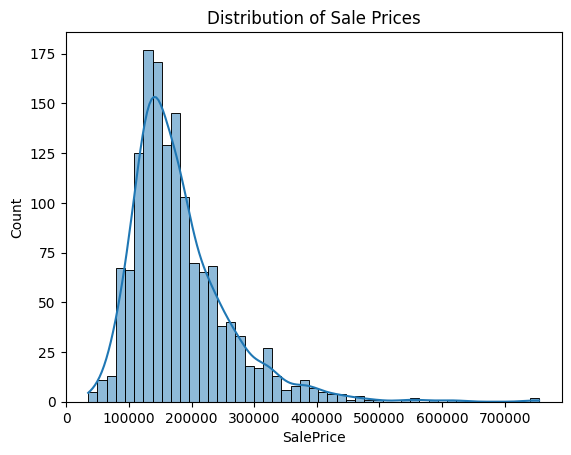

In [7]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/house_dataset/train.csv')

# Check for missing values and basic info
print(df.isnull().sum())
print(df.describe())

# Visualize the distribution of the target variable (SalePrice)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Step 4: Data Preprocessing

In [12]:
# Fill missing values with median or mode
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['GarageType'].fillna('None', inplace=True)

# Drop columns with too many missing values or irrelevant data
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

# Convert categorical features into numerical
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Step 5: Split Data and Train a Regression Model

In [13]:
# Split the data into training and testing sets before imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply imputation separately on X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Impute missing values in training set
X_test = imputer.transform(X_test)  # Impute missing values in test set

# Convert X_train and X_test back to DataFrames to preserve column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Drop the 'Id' column from X_train and X_test if it exists
if 'Id' in X_train.columns:
    X_train = X_train.drop(columns=['Id'])
if 'Id' in X_test.columns:
    X_test = X_test.drop(columns=['Id'])

# Check for any remaining NaN values (should be 0 after imputation)
print("Number of missing values in X_train after imputation:", X_train.isnull().sum().sum())
print("Number of missing values in X_test after imputation:", X_test.isnull().sum().sum())

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Number of missing values in X_train after imputation: 0
Number of missing values in X_test after imputation: 0


RandomForestRegressor(random_state=42)

In [27]:
# Check for any remaining NaN values
print("Number of missing values in X_train after imputation:", np.isnan(X_train).sum())
print("Number of missing values in X_test after imputation:", np.isnan(X_test).sum())


Number of missing values in X_train after imputation: MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 232, dtype: int64
Number of missing values in X_test after imputation: MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 232, dtype: int64


# Step 5: Evaluate the Model

Mean Squared Error: 831179135.8889931


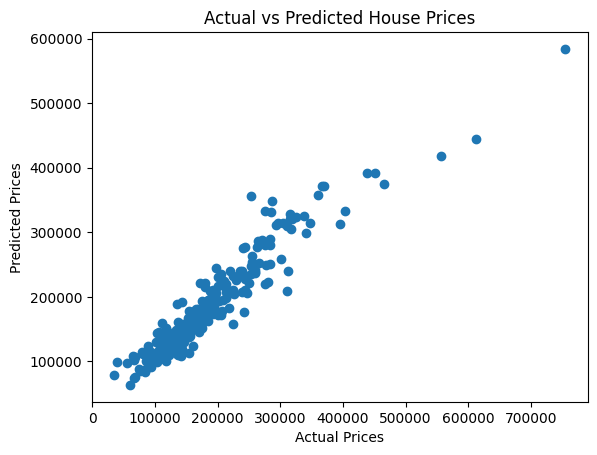

In [28]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Testing the Model

In [49]:
# Step 1: Load the test.csv file (new data)
test_df = pd.read_csv('/content/drive/My Drive/house_dataset/test.csv')  # Replace with the actual path to your test.csv

In [50]:
# Step 2: Identify non-numeric columns
non_numeric_cols = test_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [51]:
# Step 3: Encode non-numeric columns (e.g., using LabelEncoder for simplicity)
label_encoders = {}
for col in non_numeric_cols:
    label_encoders[col] = LabelEncoder()
    test_df[col] = label_encoders[col].fit_transform(test_df[col].astype(str))  # Encode the strings

In [52]:
# Step 4: Drop 'Id' column and prepare test data
test_features = test_df.drop(columns=['Id'])

In [53]:
# Step 4: Drop 'Id' column and prepare test data
test_features = test_df.drop(columns=['Id'])  # Drop 'Id' column

In [54]:
# Step 5: Apply imputation on the numeric columns
imputer = SimpleImputer(strategy='mean')
test_imputed = imputer.fit_transform(test_features)  # Impute missing values

In [55]:
# Convert to DataFrame to preserve column names
test_imputed_df = pd.DataFrame(test_imputed, columns=test_features.columns)
# Ensure test_imputed_df has the same columns as X_train
test_imputed_df = test_imputed_df.reindex(columns=X_train.columns, fill_value=0)  # Align columns with training data

In [56]:
# Step 4: Predict the target variable (SalePrice) for the new data
test_predictions = model.predict(test_imputed_df)

In [57]:
# Step 6: Create a submission DataFrame in the format of sample_submission.csv
submission = pd.DataFrame({
    'Id': test_df['Id'],  # Use the 'Id' from the original test.csv
    'SalePrice': test_predictions  # Predictions made by the model
})


In [58]:
# Step 6: Save the predictions to a CSV file for submission
submission.to_csv('/content/drive/My Drive/house_dataset/submission.csv', index=False)  # Replace with your desired output path

In [59]:
# Display the first few rows of the submission to verify
print(submission.head())

     Id  SalePrice
0  1461  112992.33
1  1462  150838.00
2  1463  169949.87
3  1464  185796.04
4  1465  222798.85


# Interactive system where a user inputs the required house features and gets a predicted price

In [60]:
# Function to take user input for house features
def get_user_input():
    print("Please enter the house details:")

    # Example input fields (you can add more based on your features)
    MSSubClass = int(input("Enter the MSSubClass (e.g., 20 for 1-Story 1946 & Newer All Styles): "))
    LotFrontage = float(input("Enter the LotFrontage (in feet): "))
    LotArea = float(input("Enter the LotArea (in square feet): "))
    OverallQual = int(input("Enter the OverallQual (rate the overall quality 1-10): "))
    OverallCond = int(input("Enter the OverallCond (rate the overall condition 1-10): "))
    YearBuilt = int(input("Enter the YearBuilt (year the house was built): "))
    GrLivArea = float(input("Enter the GrLivArea (above ground living area in square feet): "))
    FullBath = int(input("Enter the number of FullBath: "))
    GarageCars = int(input("Enter the number of GarageCars: "))

    # Add more input fields based on the features in your model

    # Create a dictionary of input
    user_data = {
        'MSSubClass': MSSubClass,
        'LotFrontage': LotFrontage,
        'LotArea': LotArea,
        'OverallQual': OverallQual,
        'OverallCond': OverallCond,
        'YearBuilt': YearBuilt,
        'GrLivArea': GrLivArea,
        'FullBath': FullBath,
        'GarageCars': GarageCars
    }

    # Convert to DataFrame
    return pd.DataFrame([user_data])

In [61]:
# Function to make predictions from user input
def predict_price(model, user_input_df, X_train_columns):
    # Step 1: Impute missing values if any
    imputer = SimpleImputer(strategy='mean')
    user_imputed = imputer.fit_transform(user_input_df)

    # Convert back to DataFrame to preserve column names
    user_imputed_df = pd.DataFrame(user_imputed, columns=user_input_df.columns)

    # Step 2: Ensure the input has the same columns as the training data
    user_imputed_df = user_imputed_df.reindex(columns=X_train_columns, fill_value=0)  # Align with training columns

    # Step 3: Predict the house price
    predicted_price = model.predict(user_imputed_df)

    return predicted_price[0]  # Return the predicted price

In [62]:

# Example usage
X_train_columns = X_train.columns  # The columns used during training

# Get user input for house features
user_input_df = get_user_input()

Please enter the house details:
Enter the MSSubClass (e.g., 20 for 1-Story 1946 & Newer All Styles): 20
Enter the LotFrontage (in feet): 50
Enter the LotArea (in square feet): 250
Enter the OverallQual (rate the overall quality 1-10): 10
Enter the OverallCond (rate the overall condition 1-10): 9
Enter the YearBuilt (year the house was built): 2001
Enter the GrLivArea (above ground living area in square feet): 50
Enter the number of FullBath: 5
Enter the number of GarageCars: 4


In [63]:
# Predict the house price based on user input
predicted_price = predict_price(model, user_input_df, X_train_columns)

# Output the predicted price
print(f"The predicted house price is: ${predicted_price:.2f}")

The predicted house price is: $268529.37


# Improving the Model

##Step 1: Feature Engineering

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_df = pd.read_csv('/content/drive/My Drive/house_dataset/train.csv')

# Create new features
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Log transform skewed features (e.g., SalePrice, GrLivArea)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['GrLivArea'] = np.log1p(train_df['GrLivArea'])

# Separate numeric and categorical columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=[object]).columns.tolist()

# Remove 'SalePrice' and 'Id' from numeric columns
numeric_cols.remove('SalePrice')
if 'Id' in numeric_cols:
    numeric_cols.remove('Id')

# Handle missing values for numeric columns using mean imputation
imputer_numeric = SimpleImputer(strategy='mean')
X_numeric = pd.DataFrame(imputer_numeric.fit_transform(train_df[numeric_cols]), columns=numeric_cols)

# Handle missing values for categorical columns using most frequent imputation
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_categorical = pd.DataFrame(imputer_categorical.fit_transform(train_df[categorical_cols]), columns=categorical_cols)

# Encode categorical columns using Label Encoding (or One-Hot Encoding if needed)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_categorical[col] = le.fit_transform(X_categorical[col])
    label_encoders[col] = le

# Combine numeric and categorical columns
X = pd.concat([X_numeric, X_categorical], axis=1)

# Set the target variable (SalePrice)
y = train_df['SalePrice']

# Remove extreme outliers
X = X[X['GrLivArea'] < 4500]  # For example, remove large outliers in living area
y = y[X['GrLivArea'] < 4500]

print(f"Final feature set shape: {X.shape}")

Final feature set shape: (1460, 81)


## Step 2: Hyperparameter Tuning

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV with verbose progress updates
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Train the model with hyperparameter tuning
rf_random.fit(X, y)

# Get the best parameters
best_rf_model = rf_random.best_estimator_

print(f"Best RandomForest parameters: {rf_random.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best RandomForest parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


## Step 3: Evaluate the tuned Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model found by RandomizedSearchCV on the training set
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = best_rf_model.predict(X_val)

# Evaluate the model using RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation RMSE after tuning: {rmse_val:.4f}")

Validation RMSE after tuning: 0.1454


## Step 4: Test Data Prediction

In [16]:
# Load the test dataset
test_df = pd.read_csv('/content/drive/My Drive/house_dataset/test.csv')

# Create new features in the test data
test_df['TotalBathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

# Log transform skewed features (e.g., GrLivArea)
test_df['GrLivArea'] = np.log1p(test_df['GrLivArea'])

# Handle missing values in the test data (same process as training data)
X_test_numeric = pd.DataFrame(imputer_numeric.transform(test_df[numeric_cols]), columns=numeric_cols)
X_test_categorical = pd.DataFrame(imputer_categorical.transform(test_df[categorical_cols]), columns=categorical_cols)

# Label encode the categorical features in the test set using the same encoders
for col in categorical_cols:
    X_test_categorical[col] = label_encoders[col].transform(X_test_categorical[col])

# Combine numeric and categorical test features
X_test = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# Make predictions using the tuned model
test_predictions = best_rf_model.predict(X_test)

# Convert predictions back from log scale to original scale
test_predictions = np.expm1(test_predictions)

# Prepare submission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('/content/drive/My Drive/house_dataset/submission_new2.csv', index=False)

print("Tuned model submission file created: submission.csv")

Tuned model submission file created: submission.csv


# RF search model 2 appraoch using GPU xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_child_weight': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2],
}

# Initialize XGBoost with GPU support
xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', random_state=42)

# Perform RandomizedSearchCV with updated parameters
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Train the model using GPU
xgb_random.fit(X_train, y_train)

# Get the best parameters
best_xgb_model = xgb_random.best_estimator_

print(f"Best XGBoost parameters: {xgb_random.best_params_}")

In [ ]:
#1. Save your trained XGBoost model:
best_xgb_model.save_model('xgb_model.json')  # Save the trained model to a file

In [ ]:
#2. Load the pre-trained model and continue training:
# Load the saved model
loaded_xgb_model = xgb.XGBRegressor()
loaded_xgb_model.load_model('xgb_model.json')

# Continue training with new data or the same data
loaded_xgb_model.fit(X_train, y_train, xgb_model=loaded_xgb_model)

# Save the continued training model again if needed
loaded_xgb_model.save_model('xgb_model_continued.json')

# Improve Section 2: Combining Models with Stacking

## Improve Section 2: Combining Models with Stacking

In [17]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Step 2: Define Individual Models

In [18]:
# Define individual models
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

## Step 3: Create the Stacking Regressor

In [19]:
# Create a stacking regressor
stack_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgbm', lgbm_model)],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
)

# Train stacking model on the training data
stack_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3223
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 72
[LightGBM] [Info] Start training from score 12.029314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=Non...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.05,
                                             n_estimators=200,
                                             random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

## Step 4: Evaluate the Stacking Model

In [20]:
# Make predictions on the validation set
y_pred_val = stack_model.predict(X_val)

# Evaluate the model using RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation RMSE after stacking: {rmse_val:.4f}")

Validation RMSE after stacking: 0.1592


## Step 5: Predict on the Test Data

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Separate numeric and categorical columns
numeric_cols = test_features.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_features.select_dtypes(include=['object']).columns

# Step 2: Impute missing values in numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
test_numeric_imputed = imputer_numeric.fit_transform(test_features[numeric_cols])

# Step 3: Handle categorical columns with mode imputation and OneHotEncoding
imputer_categorical = SimpleImputer(strategy='most_frequent')
test_categorical_imputed = imputer_categorical.fit_transform(test_features[categorical_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
test_categorical_encoded = encoder.fit_transform(test_categorical_imputed)

# Step 4: Combine numeric and categorical columns into a single DataFrame
test_imputed_combined = np.hstack([test_numeric_imputed, test_categorical_encoded])
test_imputed_df = pd.DataFrame(test_imputed_combined, columns=list(numeric_cols) + list(encoder.get_feature_names_out(categorical_cols)))

# Ensure the test features have the same columns as the training data
X_train_columns = X_train.columns  # Assuming X_train was processed similarly to training data
missing_cols = [col for col in X_train_columns if col not in test_imputed_df.columns]

# Add any missing columns to the test_imputed_df
for col in missing_cols:
    test_imputed_df[col] = 0

# Reorder the columns to match the order of X_train
test_imputed_df = test_imputed_df[X_train_columns]

# Step 5: Predict the target variable (SalePrice) for the test data using the trained model
test_predictions = stack_model.predict(test_imputed_df)

# Convert back from log-transformed values to actual values (if applicable)
test_predictions_final = np.expm1(test_predictions)

# Step 6: Prepare the submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions_final})
submission.to_csv('/content/drive/My Drive/house_dataset/submission4.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
